In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from dchisq import DChiSq

In [9]:
import mpmath as mp

In [10]:
from scipy.special import binom

In [14]:
# Some sanity checks. Do the error probabilities even work out to be tangible numbers?

dx2 = DChiSq(0.1, 1, 100, 25)

In [19]:
S_ = 35
F_ = np.log(100)
n_ = 125
p = 125

for i4, T in enumerate(np.linspace(5, 50, 10, dtype=int)):

    t0 = time.time()
    dx2 = DChiSq(gamma_sq, sigma_sq, n_ - T, T)

    DeltaF = F_ * (S_ - T)
    # Calculate the CDF

    print(dx2.nCDF(DeltaF))


1.0
1.0
1.0
1.0
1.0
1.0
0.9999882509722628
0.8256098596996253
0.1689130781104755
0.009434477103555827


In [ ]:
# Get some feel for what the F function looks like


In [20]:
from scipy import stats

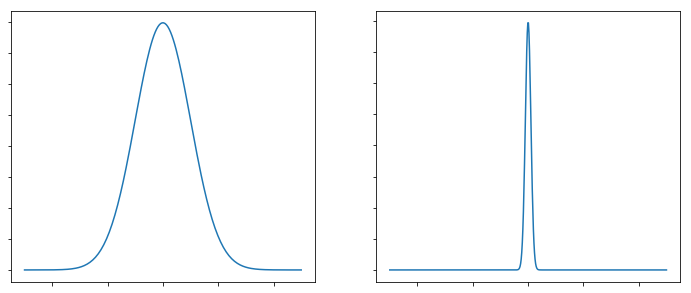

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(np.linspace(-5, 5, 200), stats.norm.pdf(np.linspace(-5, 5, 200)))
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

ax[1].plot(np.linspace(-50, 50, 500), stats.norm.pdf(np.linspace(-50, 50, 500)))
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

plt.savefig('measure_concentration.png')

In [34]:
import itertools

In [4]:
from postprocess_scaling import postprocess_dir

In [28]:
postprocess_dir('/home/akumar/nse/data/scaling/no_scaling')

In [17]:
import pandas as pd

In [29]:
d = pd.read_hdf('concat.h5')

In [30]:
d.shape

(50000, 7)

In [31]:
d.iloc[0]

p             1.000000
T            42.000000
F             9.656627
S            69.000000
n           125.000000
sigma_sq      1.000000
gamma_sq      0.100000
Name: 0, dtype: float64

Plots:

(1) Colormaps of<br>
<pre>    (a) max_T of log(p) over S vs F for the different n<br>
<pre>  (b) log(p) over T vs. F for a single S over a few n<br>
(c) optimal F (one that leads to least max_T log(p)) vs. S, n <br>

In [61]:
n = np.unique(d['n'].values)
n

array([ 125,  222,  319,  416,  513,  611,  708,  805,  902, 1000])

In [63]:
nn = [n[0], n[2], n[3], n[4], n[6], n[7], n[8], n[9]]

/home/akumar/anaconda3/envs/nse/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


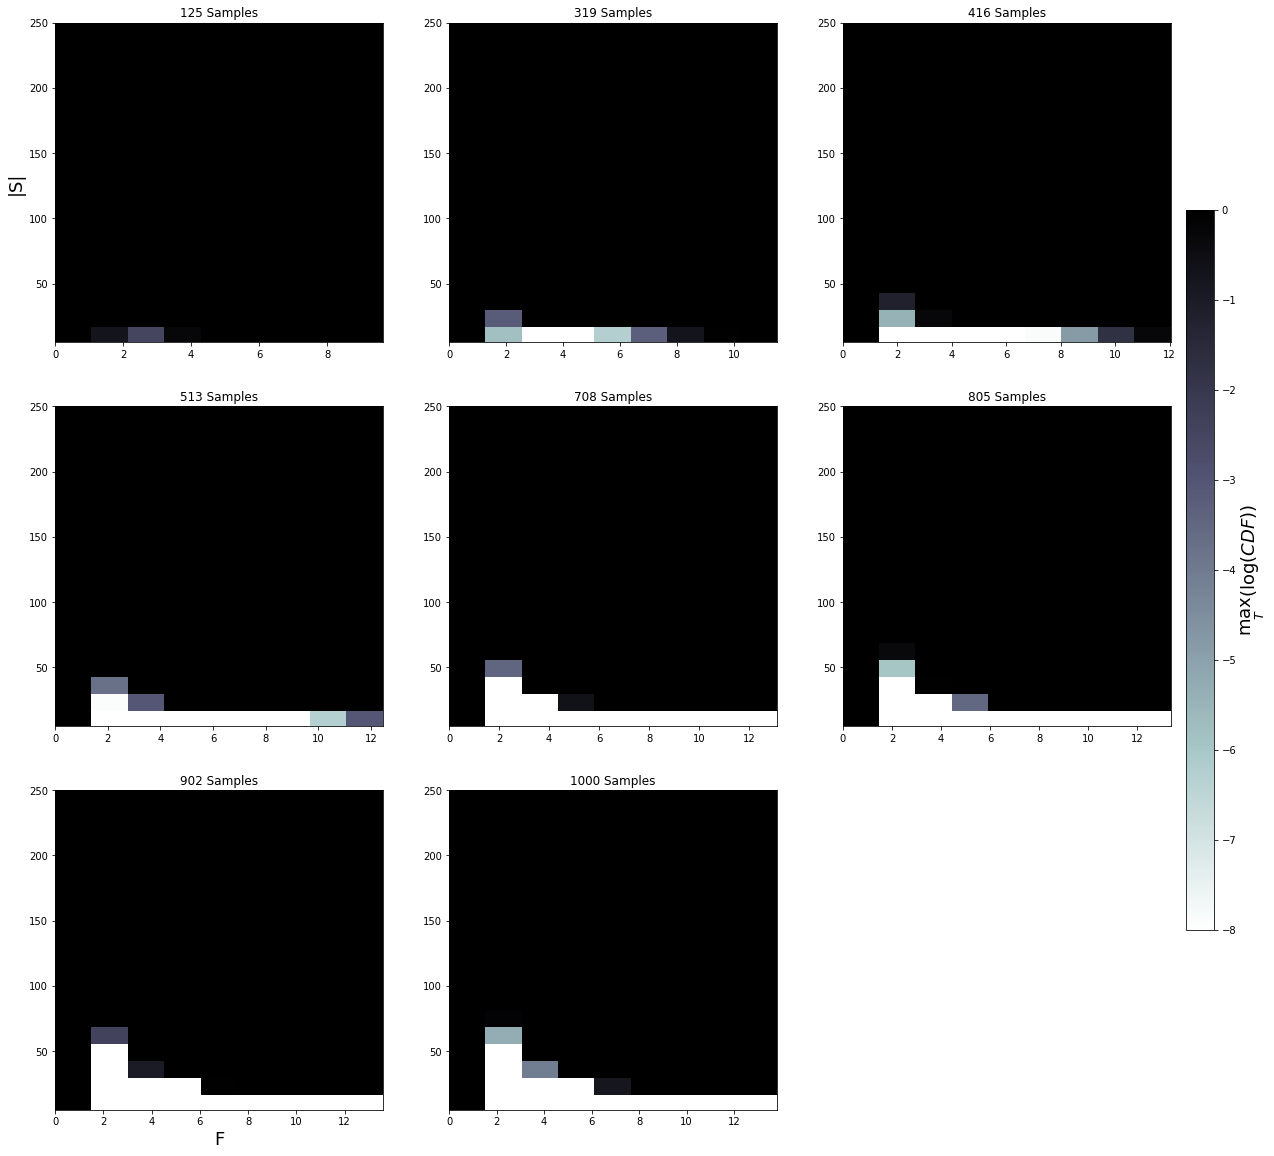

In [77]:
# (a)

fig, ax = plt.subplots(3, 3, figsize = (20, 20))

for i, n_ in enumerate(nn):
    
    dd = d.loc[d['n'] == n_]
    
    # Assemble unique combinations of S and F
    S = np.unique(dd['S'].values)
    F = np.unique(dd['F'].values)
    
    S_F = list(itertools.product(S, F))
    
    max_T = np.zeros(len(S_F))
    
    for j, S_F_ in enumerate(S_F):
    
        max_T[j] = np.log(np.max(dd.loc[(dd['S'] == S_F_[0]) & (dd['F'] == S_F_[1])]['p'].values))
        
    max_T_rect = np.reshape(max_T, (S.size, F.size))        
    
    a = ax[np.unravel_index(i, (3, 3))]    
    a.set_title('%d Samples' % n_)
    h = a.pcolormesh(F, S, max_T_rect, vmax = 0, vmin = -8, cmap = 'bone_r')
    
ax[0, 0].set_ylabel('|S|', fontsize = 18)
ax[2, 0].set_xlabel('F', fontsize = 18)
fig.delaxes(ax[2, -1])

fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.91, 0.25, 0.02, 0.5])
cbar = fig.colorbar(h, cax = cbar_ax)
cbar.set_label('$\max_T (\log(CDF))$', fontsize = 18)

plt.savefig('maxT.pdf', bbox_inches='tight', pad_inches=0)

In [54]:
S

array([  5,  17,  30,  43,  56,  69,  82,  95, 108, 121, 133, 146, 159,
       172, 185, 198, 211, 224, 237, 250])

/home/akumar/anaconda3/envs/nse/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


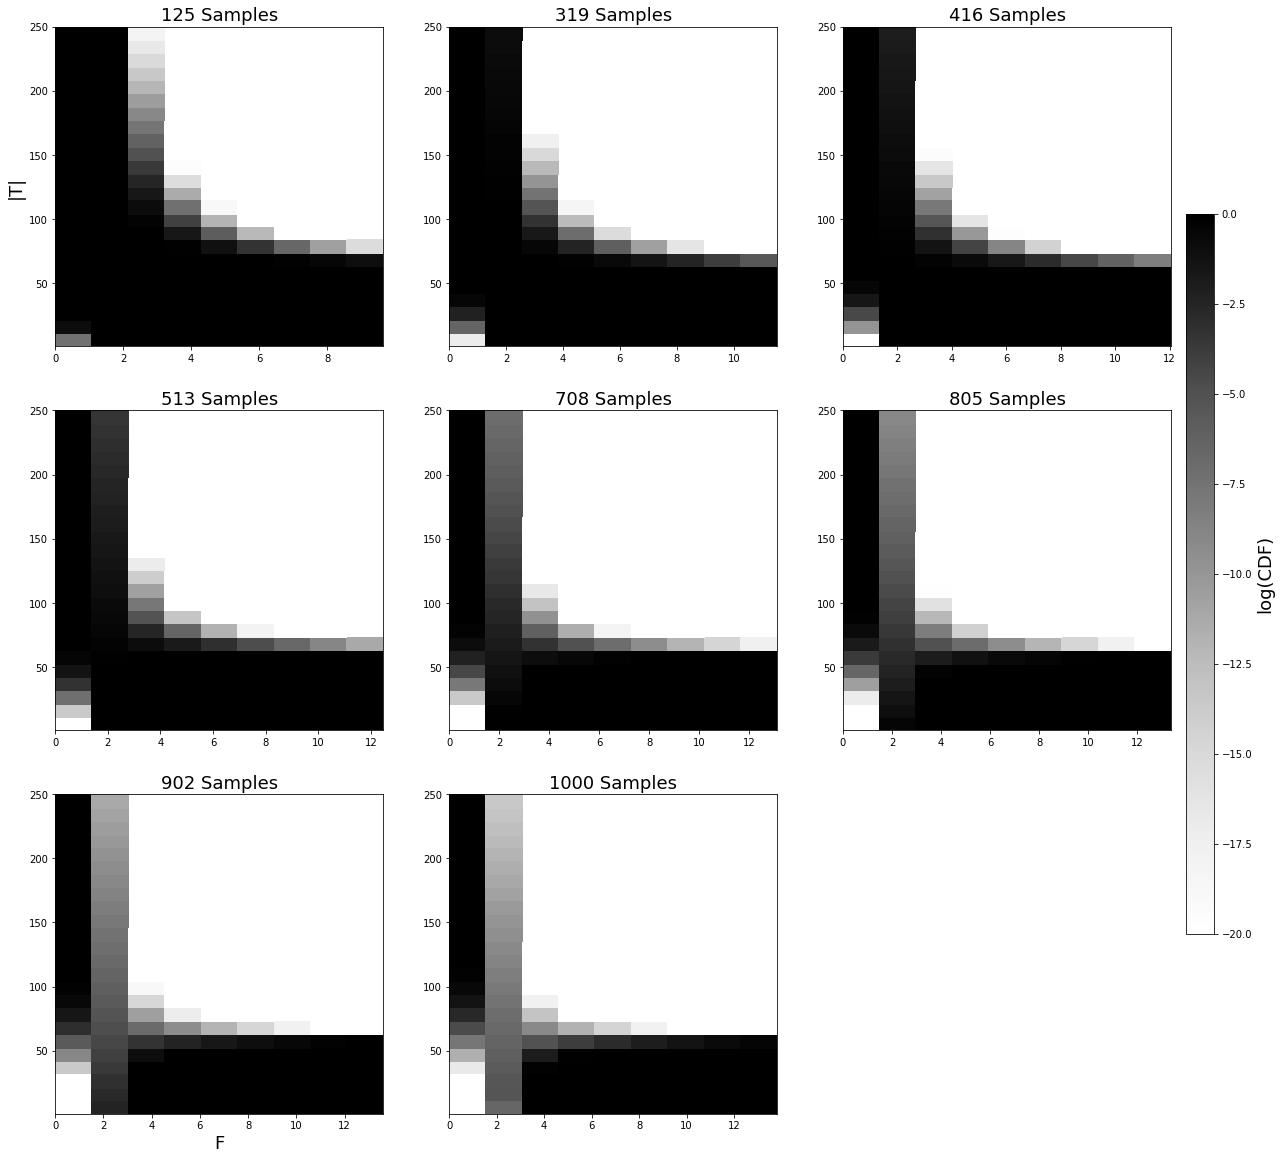

In [86]:
# (b) Let S = 56

fig, ax = plt.subplots(3, 3, figsize = (20, 20))

d_ = d.loc[d['S'] == 56]

for i, n_ in enumerate(nn):
    dd = d_.loc[d_['n'] == n_]
     
    # Assemble unique combinations of S and F                                        
    T = np.unique(dd['T'].values)
    F = np.unique(dd['F'].values)
    
    T_F = list(itertools.product(T, F))
    
    p = np.zeros(len(T_F))
    
    for j, T_F_ in enumerate(T_F):
    
        p[j] = np.log(dd.loc[(dd['T'] == T_F_[0]) & (dd['F'] == T_F_[1])]['p'].values)
        
    p_rect = np.reshape(p, (T.size, F.size))        
    
    a = ax[np.unravel_index(i, (3, 3))]    
    h = a.pcolormesh(F, T, p_rect, vmax = 0, vmin = -20, cmap = 'Greys')
    a.set_title('%d Samples' % n_, fontsize = 18)

ax[0, 0].set_ylabel('|T|', fontsize = 18)
ax[2, 0].set_xlabel('F', fontsize = 18)
fig.delaxes(ax[2, -1])

fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.91, 0.25, 0.02, 0.5])
cbar = fig.colorbar(h, cax = cbar_ax)
cbar.set_label('log(CDF)', fontsize = 18)

plt.savefig('TvF.pdf', bbox_inches='tight', pad_inches=0)